### MANISH KUMAR
#### D19018

In [1]:
#inintialize important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.chdir("C:\\Users\\MANDY\\Desktop\\dataset\\bank")

In [3]:
#read dataset
train=pd.read_csv("bank dataset.csv")

In [4]:
# head of the dataset
train.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
train.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


* as u can see above this corelation matrix shows that this data set has no perfect corellation , so now we will go for classifaction , latter we will discuss we will go for which classification method and why ?

In [7]:
train.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [25]:
#describe the call duration i.e duration is a variable name which can saw above
train['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [26]:
# Contingency Table
data_crosstab = pd.crosstab(train['duration'], 
                            train['deposit'],  
                               margins = True) 
data_crosstab.transpose()

duration,0,1,2,3,4,5,6,7,8,9,...,3183,3253,3284,3322,3366,3422,3785,3881,4918,All
deposit,,,,,,,,,,,,,,,,,,,,,
no,3,2,3,4,15,35,45,73,84,77,...,0,0,1,1,1,1,1,0,1,39922
yes,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,1,0,5289
All,3,2,3,4,15,35,45,73,85,77,...,1,1,1,1,1,1,1,1,1,45211


###  null value check

In [31]:
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

* conclusion- as you  can see here is not any null value

# classifacation model

In [33]:
# limit to categorical data using df.select_dtypes()
X = train.select_dtypes(include=[object])
X.head(3)

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit,duration_status
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no,above_average
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no,below_average
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no,below_average


In [18]:
X.shape

(45211, 10)

In [34]:
# import preprocessing from sklearn
from sklearn import preprocessing

In [35]:
X.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit', 'duration_status'],
      dtype='object')

In [36]:
# TODO: create a LabelEncoder object and fit it to each feature in X


# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
X_2 = X.apply(le.fit_transform)
X_2.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit,duration_status
0,4,1,2,0,1,0,2,8,3,0,0
1,9,2,1,0,1,0,2,8,3,0,1
2,2,1,1,0,1,1,2,8,3,0,1
3,1,1,3,0,1,0,2,8,3,0,1
4,11,2,3,0,0,0,2,8,3,0,1


In [37]:
#  TODO: create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X_2)

# 3. Transform
onehotlabels = enc.transform(X_2).toarray()
onehotlabels.shape

# as you can see, you've the same number of rows 891
# but now you've so many more columns due to how we changed all the categorical data into numerical data

(45211, 48)

In [23]:
onehotlabels

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [38]:

type(onehotlabels)

numpy.ndarray

In [39]:
X_2.head(4)

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit,duration_status
0,4,1,2,0,1,0,2,8,3,0,0
1,9,2,1,0,1,0,2,8,3,0,1
2,2,1,1,0,1,1,2,8,3,0,1
3,1,1,3,0,1,0,2,8,3,0,1


In [40]:
X_2.drop(['default'],axis=1)
X_2.drop(['month'],axis=1)

,job,marital,education,default,housing,loan,contact,poutcome,deposit,duration_status
0,4,1,2,0,1,0,2,3,0,0
1,9,2,1,0,1,0,2,3,0,1
2,2,1,1,0,1,1,2,3,0,1
3,1,1,3,0,1,0,2,3,0,1
4,11,2,3,0,0,0,2,3,0,1
5,4,1,2,0,1,0,2,3,0,1
6,4,2,2,0,1,1,2,3,0,1
7,2,0,2,1,1,0,2,3,0,0
8,5,1,0,0,1,0,2,3,0,1
9,9,2,1,0,1,0,2,3,0,1


In [41]:
#seperating independent and dependent variables
y = X_2['deposit']
X = X_2.drop(['deposit'], axis=1)

In [42]:
X_2.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit', 'duration_status'],
      dtype='object')

In [43]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split

In [44]:
#creating the train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 1000, stratify=y, test_size=0.100)

In [45]:
# distribution in training set
y_train.value_counts(normalize=True)

0    0.883015
1    0.116985
Name: deposit, dtype: float64

In [46]:
# distribution in validation set
y_valid.value_counts(normalize=True)

0    0.883016
1    0.116984
Name: deposit, dtype: float64

In [47]:

#shape of validation set
X_valid.shape, y_valid.shape

((4522, 10), (4522,))

## decision tree Classifier

In [48]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [49]:
# how to import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [50]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=100)#fitting the model
# dt_model.fit(X_train, y_train))

In [51]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [52]:
#checking the training score
dt_model.score(X_train, y_train)

0.9322175526555089

In [53]:
#checking the validation score
dt_model.score(X_valid, y_valid)

0.8812472357363998

In [54]:
#predictions on validation set
dt_model.predict(X_valid)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
dt_model.predict_proba(X_valid)

array([[0.66666667, 0.33333333],
       [0.7755102 , 0.2244898 ],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [1.        , 0.        ]])

In [56]:
y_pred = dt_model.predict_proba(X_valid)[:,1]

In [57]:
y_new = []
for i in range(len(y_pred)):
    if y_pred[i]<=0.7:
        y_new.append(0)
    else:
        y_new.append(1)

## Classification accuracy

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_valid, y_new)

0.8825740822644847

In [60]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_valid, y_new))
print(rms)

0.3426746528932586


In [145]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=100)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [147]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.883095,0.883016
1,2,0.883095,0.883016
2,3,0.886457,0.884343
3,4,0.887490,0.884564
4,5,0.892149,0.892304


In [148]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.883095,0.883016
1,2,0.883095,0.883016
2,3,0.886457,0.884343
3,4,0.887490,0.884564
4,5,0.892149,0.892304


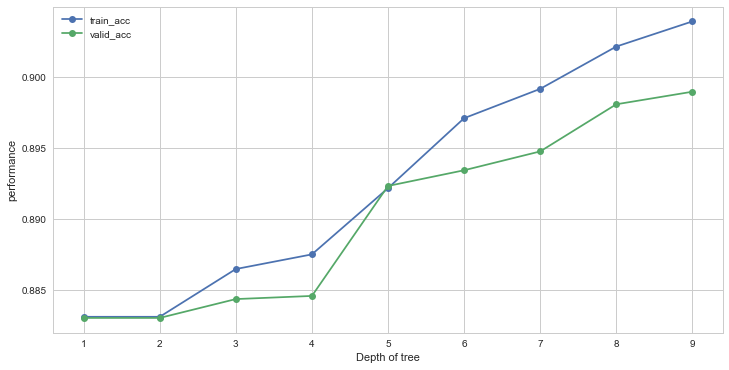

In [149]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

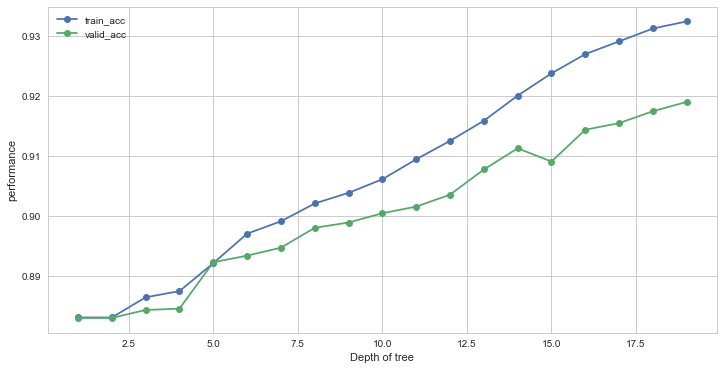

In [152]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,20):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=2000)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))
frame = pd.DataFrame({'max_depth':range(1,20), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

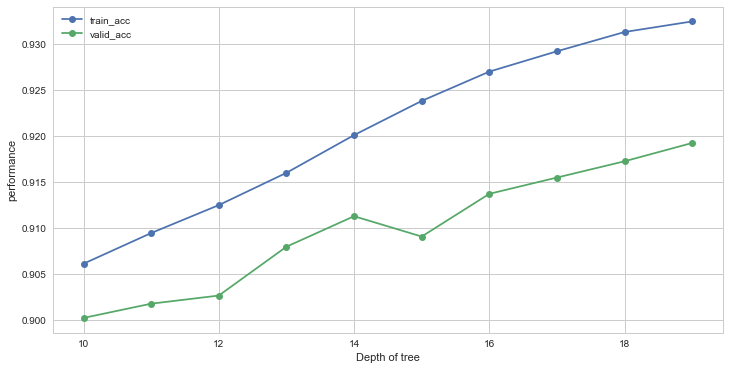

In [154]:
train_accuracy = []
validation_accuracy = []
for depth in range(10,20):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=20000)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))
frame = pd.DataFrame({'max_depth':range(10,20), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

## hyperparameter tunning

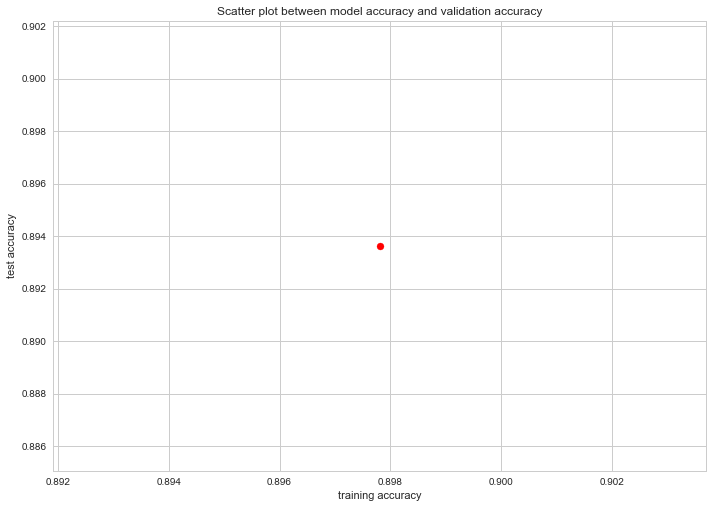

In [160]:
dt_model = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20, random_state=100)
#fitting the model
dt_model.fit(X_train, y_train)
#Training score
x=dt_model.score(X_train, y_train)
#Validation score
y1=dt_model.score(X_valid, y_valid)
# Plot
plt.scatter(x, y1, color='Red')
plt.title('Scatter plot between model accuracy and validation accuracy')
plt.xlabel('training accuracy')
plt.ylabel('test accuracy')
plt.show()

In [166]:
#Validation score
dt_model.score(X_valid, y_valid)

0.8936311366651923

* max_leaf_nodes
* min_samples_split
* min_samples_leaf

In [167]:
## Again tune the hyperparameter
dt_model = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, random_state=500)
#fitting the model
dt_model.fit(X_train, y_train)
#Training score
dt_model.score(X_train, y_train)

0.896307656010381

In [168]:
#Validation score
dt_model.score(X_valid, y_valid)

0.8927465723131358

## f_1 score for accuracy


In [169]:
# imports for classifiers and metrics
from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive6_bayes import GaussianNB
from sklearn.metrics import f1_score

In [171]:
# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

TypeError: Singleton array 0.8936311366651923 cannot be considered a valid collection.

In [172]:
# Decision Tree Classifier

# instantiate
dtc = DecisionTreeClassifier()

# fit
dtc.fit(X_train, y_train)

# predict
y_pred = dtc.predict(X_test)

# f1 score
score = f1_score(y_pred, y_test)

# print
print( "Decision Tree F1 score: {:.2f}".format(score))

Decision Tree F1 score: 0.37


In [173]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_pred, y_test))
print(rms)

0.34212361972800714


## Random forest

In [174]:
# add some hyperparameter

In [1]:
import sklearn.ensemble as ansemble

In [2]:
baggedModel = ansemble.BaggingClassifier(base_estimator=5, n_estimators=50, oob_score=True)

In [3]:
baggedModel.fit(X,y)

NameError: name 'X' is not defined

In [79]:
baggedModel.score(X,y)

0.930569994028002

In [80]:
pred=baggedModel.score(X,y)

In [81]:
pred=baggedModel.predict(X)
pred[1:5]

array([0, 0, 0, 0], dtype=int64)

In [82]:
from scipy.stats import itemfreq
itemfreq(pred)

array([[    0, 41975],
       [    1,  3236]], dtype=int64)

In [180]:
randomForest = ansemble.RandomForestClassifier(n_estimators=50, max_features=0.5, oob_score=True)

In [181]:
randomForest.fit(X,y)

TypeError: Singleton array array(0.89363114) cannot be considered a valid collection.

In [182]:
randomForest.base_estimator_

AttributeError: 'RandomForestClassifier' object has no attribute 'base_estimator_'

In [86]:
randomForest.predict(X)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [87]:
pred2 = randomForest.predict(X)
itemfreq(pred2)

array([[    0, 41988],
       [    1,  3223]], dtype=int64)

In [88]:
randomForest.feature_importances_

array([0.18850794, 0.06497495, 0.08452927, 0.00704791, 0.04055729,
       0.02749159, 0.06062525, 0.23562434, 0.13588821, 0.15475324])

In [89]:
randomForest.feature_importances_

array([0.18850794, 0.06497495, 0.08452927, 0.00704791, 0.04055729,
       0.02749159, 0.06062525, 0.23562434, 0.13588821, 0.15475324])

In [90]:
randomForest.oob_score_

0.8843201875649731

In [91]:
randomForest.score(X,y)

0.9305036384950565

In [92]:
randomForest.score(X,y)

0.9305036384950565

In [93]:
#shape of training set
X_train.shape, y_train.shape

((40689, 10), (40689,))

## Boosting

In [63]:
# use sklearn for sckitlearn 
# imrove accuracy from 91 to take to it 96 so use concept of boosting

In [94]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [95]:
adaBoost = ansemble.AdaBoostClassifier()

In [96]:
AdaBoost = AdaBoostClassifier(n_estimators=1000,learning_rate=2,algorithm='SAMME')

In [97]:
adaBoost.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [98]:
prediction = adaBoost.score(X,y)
prediction

0.8968171462697131

# Again tune the hyperpameter

In [142]:
AdaBoost = AdaBoostClassifier(n_estimators=500,learning_rate=1,algorithm='SAMME')

In [143]:
adaBoost.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [144]:
prediction = adaBoost.score(X,y)
prediction

0.8968171462697131